In [1]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner

In [2]:
# Physical Constants/Unit Conversions
c = 299792.458 # [km/s]
secondsToInvAngEv = 1./6.5821220e-16
AngHzToEv = 1/secondsToInvAngEv

# Experiment Constants
v0 = 220.0 # [km/s]
vObs = 232.36 # [km/s]
alphaSq = 0.5 # common value for a SQUID
Rho_dm = 2.305e-6 # Rho_DM in eV^4
# The background below is the typical, temperature-independent 
# flux noise for commercial SQUIDs at frequencies greater than ∼10 Hz
PSDback = (4.044e2)**2 # This is S_{\Phi,0} in 1/eV.
Lind = 1e0 # [nH]

### Detector-Specific Parameters
R = .03 # [m]
B_Max_Tesla = 1.0 # [T]
Lind = 1.0 # [nH]

### Detector Parameters in Natural Units
V_B = 2.1289e20 * R**3 # [eV^(-3)]
B_Max = 1.9536e2 * B_Max_Tesla # [eV^2]
Lpind =  np.pi * R / 4. / (7.95e5) * 1e9 # [nH]

### Conversion Factor 
factor = 1e9/np.sqrt(alphaSq / 4 * Lind / Lpind *B_Max**2 * V_B**2 * Rho_dm)*AngHzToEv**.5

In [3]:
# Load the Coarse Scan Data
mass_set = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Mass_TestSet.npy')
A_Limits = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/A_Limits.npy')
Detection_Threshold = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Detection_Threshold.npy')
Sigma_A = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Sigma_A.npy')

# Load the Bulk-Only MultiNest Scan
chain_file ='/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Halo_Only_Chains/post_equal_weights.dat'
Bulk_Only_Chain = np.array(np.loadtxt(chain_file))[:, [0, 2, 3, 4, 5]]

# Load the Bulk+Stream MultiNest Scan
chain_file ='/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Stream_Halo_Chains/post_equal_weights.dat'
Bulk_Part_Chain = np.array(np.loadtxt(chain_file))[:, [0, 2, 3, 4, 5]]
Stream_Part_Chain = np.array(np.loadtxt(chain_file))[:, [6, 7, 8, 9, 10]]

In [4]:
def plot_MC(mass_Set, A_Limits, Detection_Threshold, Sigma_A):
    
    masses = mass_Set * AngHzToEv
    
    # Sensitivity Lines
    g_Limits = factor * np.sqrt(A_Limits)
    g_ExpectedConstraint = 1.282 * factor * np.sqrt(Sigma_A)
    g_DetectionThresh = factor * np.sqrt(Detection_Threshold)
    
    # Sensitivity Bands
    OneSigUp = 1.542 * factor * np.sqrt(Sigma_A)
    TwoSigUp = 1.815 * factor * np.sqrt(Sigma_A)
    OneSigDown = 1.0713 * factor * np.sqrt(Sigma_A)
    
    # Power-limited statistics
    g_Limits = np.maximum(g_Limits, OneSigDown)  
    
    # Realized Limits, Expected Constraint, Detection Threshold
    plt.plot(masses, g_Limits)
    plt.plot(masses, g_ExpectedConstraint, lw = 2, label = r'95\% Limit', ls = 'dashdot', c = 'black')
    plt.plot(masses, g_DetectionThresh, lw = 2, label = r'$5\sigma$ Detection', ls = '--', c = 'black')
    
    # Error Bands
    plt.fill_between(masses, OneSigDown, OneSigUp, color = 'limegreen', zorder = 2,
                     label = r'$1\sigma$ Expected Constraint')
    plt.fill_between(masses, OneSigDown, TwoSigUp, color = 'yellow', zorder = 1, 
                     label = r'$2\sigma$ Expected Constraint', lw = 0)
    
    plt.legend()

# Values of the form [A, vO, v_\odot, \alpha, \bar t]
def Bulk_CornerPlot(chain, truths = [8000.0*26, 220, 232.36, .49, 72.4]):
    corner.corner(chain, smooth=1.5, 
              smooth1d=1, quantiles=[0.16, 0.5, 0.84], show_titles=True,
              title_fmt='.2f', title_args={'fontsize': 14},
              labels = ['$A$', '$v_0$', '$v_\odot$', '$\\alpha$', '$\\bar t$'],
              truths = truths, range=[1 for _ in range(chain.shape[1])],
              plot_datapoints=False, verbose=False)
    

# Values of the form [v0, v_\odot, \alpha, \bar t, x]
def Stream_CornerPlot(chain, truths = [10.0, 418.8, .659, 279.51, .05]):
    corner.corner(chain, smooth=1.5, 
                  smooth1d=1, quantiles=[0.16, 0.5, 0.84], show_titles=True,
                  title_fmt='.2f', title_args={'fontsize': 14},
                  labels = ['$v_0^{str}$', '$v_{\odot}^{\\rm str}$', '$\\alpha^{\\rm str}$', 
                            '$\\bar t^{\\rm str}$', '$x^{\\rm str}$'],
                  truths = truths, range=[1 for _ in range(chain.shape[1])],
                  plot_datapoints=False, verbose=False)

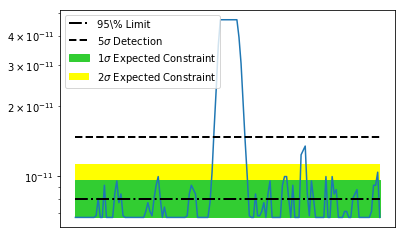

In [5]:
plot_MC(mass_set, A_Limits, Detection_Threshold, Sigma_A)
plt.xscale('log')
plt.yscale('log')
plt.show()

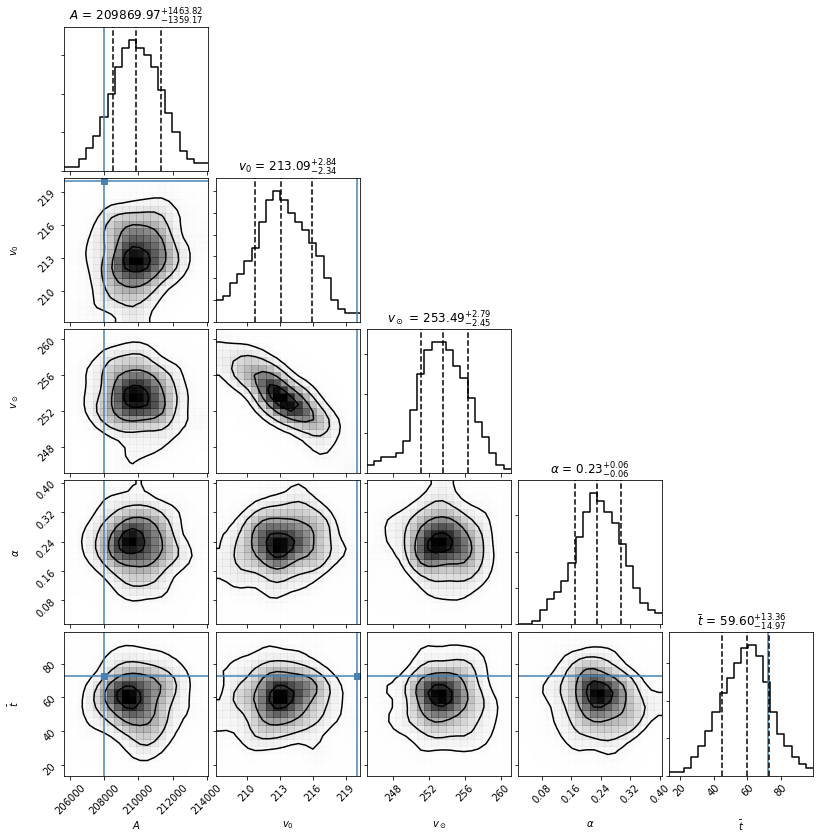

In [6]:
Bulk_CornerPlot(Bulk_Only_Chain)
plt.show()

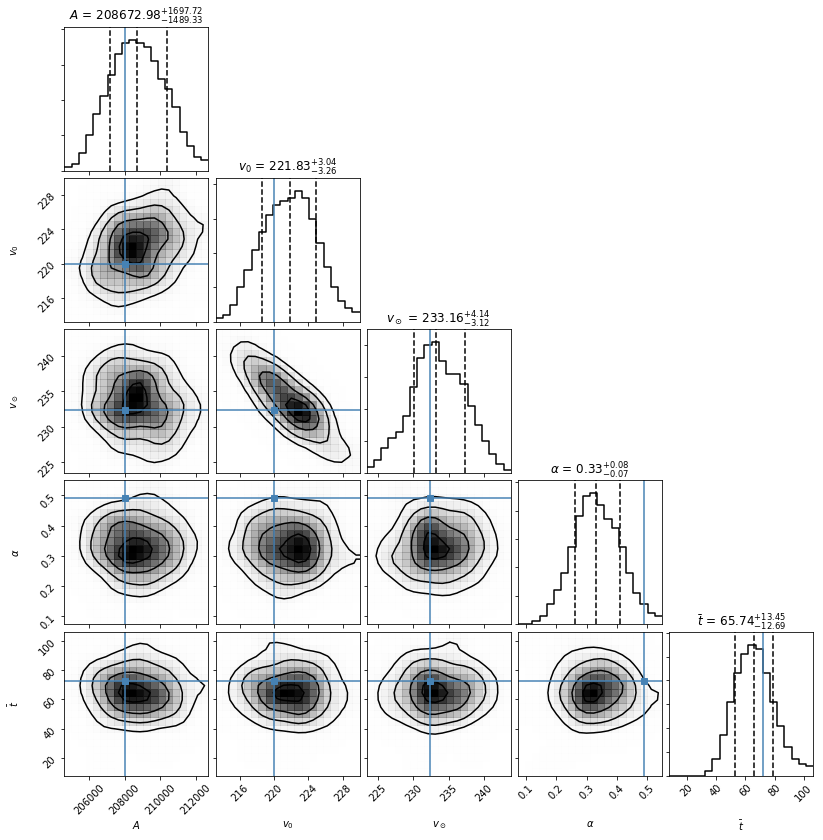

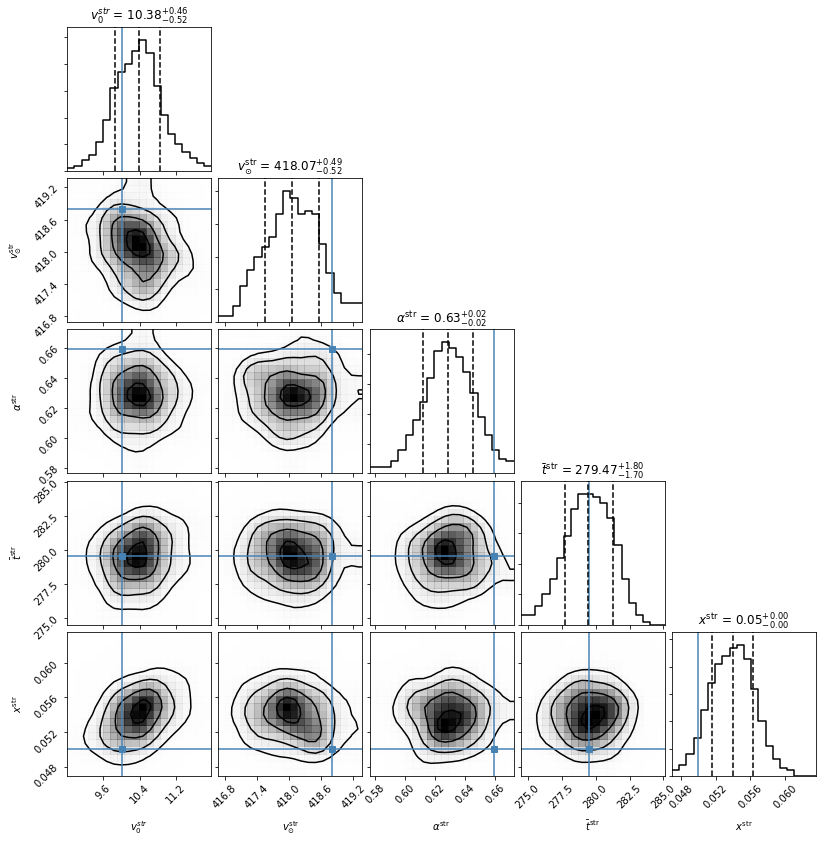

In [7]:
Bulk_CornerPlot(Bulk_Part_Chain)
plt.show()

Stream_CornerPlot(Stream_Part_Chain)
plt.show()